In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, poisson, norm

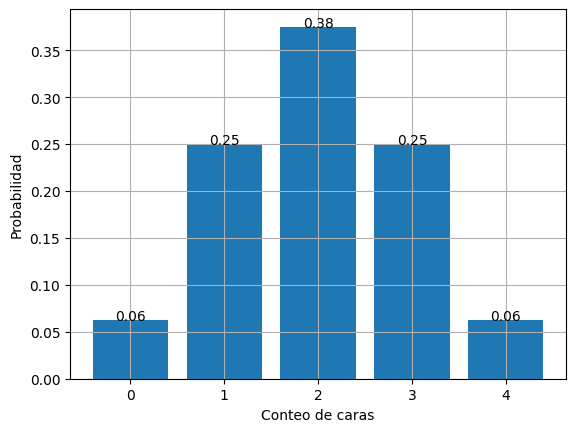

In [14]:
# En un lanzamiento de cuatro monedas, cual es la probabilidad de obtener dos caras P(X=2), 
# y cual es la probabilidad de obtener 3 o menos caras? P(X<=3) hint= esto es sumar la P(X=0) + P(X=1) +P(X=2) + P(X=3)
# espacio_muestra = 0,1,2,3,4 
n = 4
p = 0.5
results = [0,1,2,3,4] # list(range(n+1))
freqs = [binom.pmf(i,n,p) for i in results]  # los argumentos de binom.pmf son numero de exitos, eventos, y probabilidad
plt.bar(results,freqs)
for i, val in enumerate(freqs): # enumerate nos devuelve como primer termino el indice de la coleccion y como segundo termino el valor
    plt.text(i, val, round(val,2),ha="center") # los argumentos de text son las coordenadas x,y, y el valor a escribir
plt.grid(True)
plt.xlabel("Conteo de caras")
plt.ylabel("Probabilidad")
plt.show()

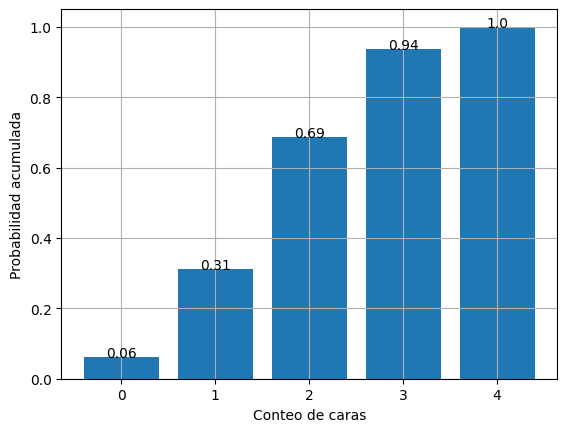

In [16]:
accum_freqs = [sum(freqs[:i+1]) for i in range(len(freqs))]
plt.bar(results, accum_freqs)
for i, val in enumerate(accum_freqs): # enumerate nos devuelve como primer termino el indice de la coleccion y como segundo termino el valor
    plt.text(i, val, round(val,2),ha="center") # los argumentos de text son las coordenadas x,y, y el valor a escribir
plt.grid(True)
plt.xlabel("Conteo de caras")
plt.ylabel("Probabilidad acumulada")
plt.show()


In [6]:
binom.pmf(1,4,0.5) # tres argumentos, el primero es el numero de exitos, el segundo es la cantidad de eventos, y el ultimo es la probabilidad.

np.float64(0.25)

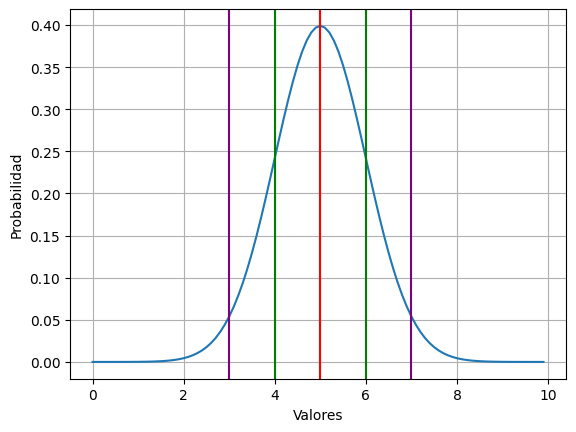

In [26]:
start = 0
end = 10
num = 100
numbers = [start+i*(end-start)/num for i in range(num)]
freqs = [norm.pdf(value,5,1) for value in numbers ] # los argumentos de norm.pdf son numero de sucesos, media, y desviacion estandar
plt.plot(numbers, freqs)
plt.grid(True)
plt.axvline(5, color = "red")
plt.axvline(4, color = "green")
plt.axvline(6, color = "green")
plt.axvline(3, color = "purple")
plt.axvline(7, color = "purple")
plt.xlabel("Valores")
plt.ylabel("Probabilidad")
plt.show()

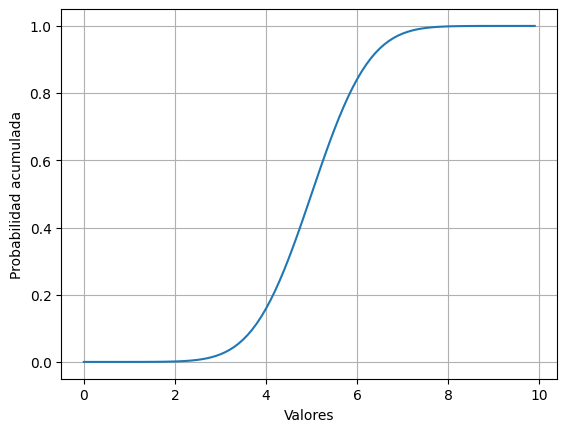

In [ ]:
accum_freqs = [norm.cdf(value,5,1) for value in numbers ] 
plt.plot(numbers, accum_freqs)
plt.grid(True)
plt.xlabel("Valores")
plt.ylabel("Probabilidad acumulada")
plt.show()

In [30]:
# Una maquina produce sacos de centeno, que pesan 3 kilos con una desviacion estandar de 0.5 kilos. Un operario opina que la maquina
# no esta bien calibrada. Toma unas muestras al azar [2.3, 2.9, 3.1, 2.5, 2.8, 3.0, 2.7], he indica que definitivamente la maquina
# no esta haciendo sacos de 3 kilos
# Podemos darle la razon al operario?
# Definimos la hipotesis 
# H0: mu = 3
# H1: mu != 3
# nivel de significancia: alfa = 0.05
# Los parametros dados, son poblacionales 
sacks = np.array([2.3, 2.9, 3.1, 2.5, 2.8, 3.0, 2.7])
population_mean = 3
population_std = 0.5
sample_mean = sacks.mean()
sample_std = sacks.std()
print(f'media: {sample_mean:.2f} y desviacion: {sample_std:.2f}')

media: 2.76 y desviacion: 0.26


In [34]:
z_score = (sample_mean-population_mean)/(population_std/np.sqrt(len(sacks))) # numerador la diferencia de la media poblacional y muestral
# denominador es la desviacion estandar de la poblacion entre la raiz cuadrada de la cantidad de muestras (error estandar)
# z_score # cuanto a la izquierda en error estandar
p_value = 2*(1-norm.cdf(abs(z_score)))
print(f' z_score es: {z_score:.2f} y el p_value es:{p_value:.2f}')
# si el p_value es mayor que el nivel de significancia se rechaza la hipotesis alterna,
# si el p_value es menor que el nivel de significancia no se tienen argumentos para rechazar la hipotesis alterna.
# entonces no le damos la razon al operario

 z_score es: -1.29 y el p_value es:0.20
